In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# Import librairies
import math
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("../input/creditcard.csv")

# Any results you write to the current directory are saved as output.

In [92]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [93]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [96]:
# data dictionary: positive class is fraud, negative is not; only 0 and 1
fraud_ind=df[df.Class==1].index
nofraud_ind=df[df.Class==0].index
fraud_num=len(fraud_ind)
nofraud_num=len(nofraud_ind)
fraud_perc=round(fraud_num/(fraud_num+nofraud_num),5)*100
print("% of fraud of all transactions is ", fraud_perc, "%")
# imbalanced dataset
# fraudulent transactions make up 0.173% portion of the data set

% of fraud of all transactions is  0.173 %


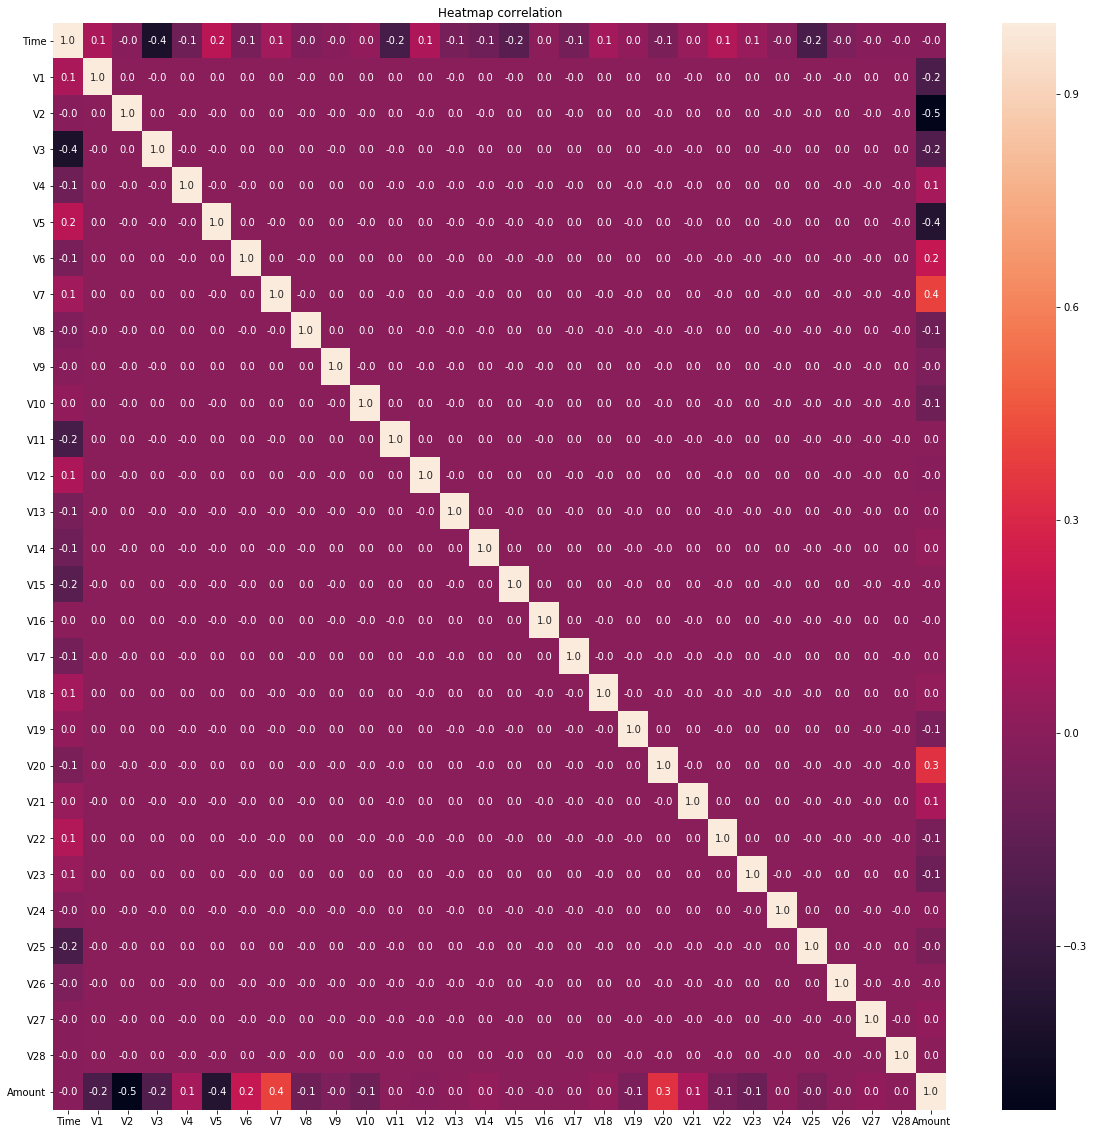

In [97]:
# Feature Selection
# Correlation
import seaborn as sns
xx=df.drop(['Class'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(xx.corr(),annot=True,fmt= '.1f')
plt.title('Heatmap correlation')
plt.show()
# Most features have no or low correlations
# Selected features: V1-28, Amount

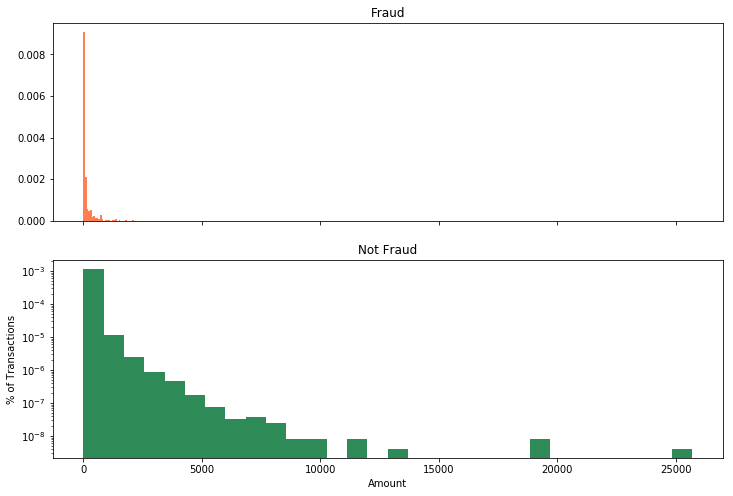

In [108]:
# Feature Selection
# Features: Amount, Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))
bins = 30

ax1.hist(df.Amount[df.Class==1],bins=bins, normed=True,color='coral')
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class==0],bins=bins, normed=True,color='seagreen')
ax2.set_title('Not Fraud')

plt.xlabel('Amount')
plt.ylabel('% of Transactions')
plt.yscale('log', nonposy='clip')
plt.show()

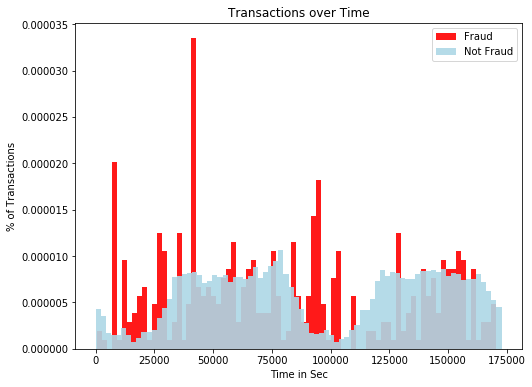

In [60]:
bins=80
plt.figure(figsize=(8,6))
plt.hist(df.Time[df.Class==1],bins=bins,normed=True,alpha=0.9,label='Fraud',color='red')
plt.hist(df.Time[df.Class==0],bins=bins,normed=True,alpha=0.9,label='Not Fraud',color='lightblue')
plt.legend(loc='upper right')
plt.xlabel('Time in Sec')
plt.ylabel('% of Transactions')
plt.title('Transactions over Time')
plt.show()
# Inverse trends between fraudulent activity and nonfraudulent activity.
# Downturn in regular transactions, fraudulent activity increase. eg: 100,000 sec

In [109]:
# Check features V1-V28 at once
y=df.Class
x=df.drop(['Class','Time','Amount'],axis=1)

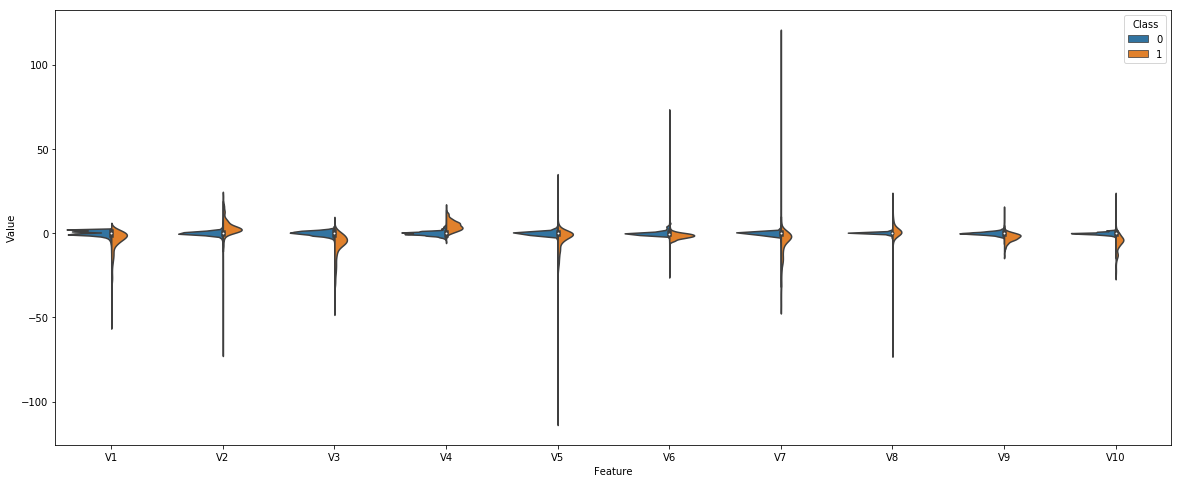

In [110]:
import seaborn as sns
# choose V1-V10
sub_df_a=pd.concat([y,x.iloc[:,0:10]],axis=1)
sub_df_aa=pd.melt(sub_df_a,id_vars="Class",var_name="Feature",value_name='Value')
plt.figure(figsize=(20,8))
sns.violinplot(x="Feature",y="Value",hue="Class",data=sub_df_aa, split=True)
# need to scale x

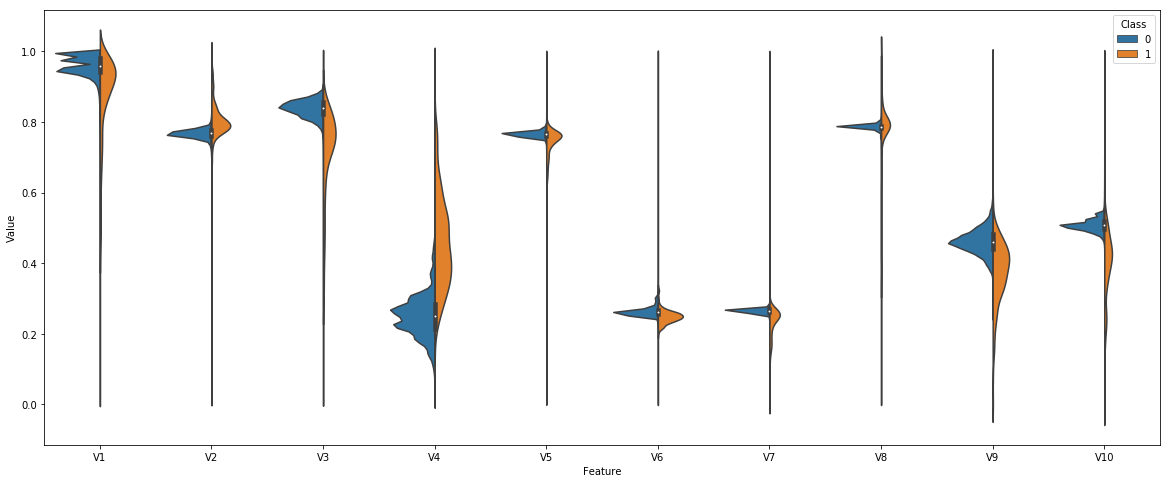

In [112]:
# Easiness to see graph: make 3 sub dfs to better v
# scale x
x_scaled=(x-x.min())/(x.max()-x.min()) 

sub_df1=pd.concat([y,x_scaled.iloc[:,0:10]],axis=1)
sub_df2=pd.concat([y,x_scaled.iloc[:,10:19]],axis=1)
sub_df3=pd.concat([y,x_scaled.iloc[:,19:28]],axis=1)
sub_df11=pd.melt(sub_df1,id_vars="Class",var_name="Feature",value_name='Value')
sub_df22=pd.melt(sub_df2,id_vars="Class",var_name="Feature",value_name='Value')
sub_df33=pd.melt(sub_df3,id_vars="Class",var_name="Feature",value_name='Value')

plt.figure(figsize=(20,8))
sns.violinplot(x="Feature",y="Value",hue="Class",data=sub_df11, split=True)

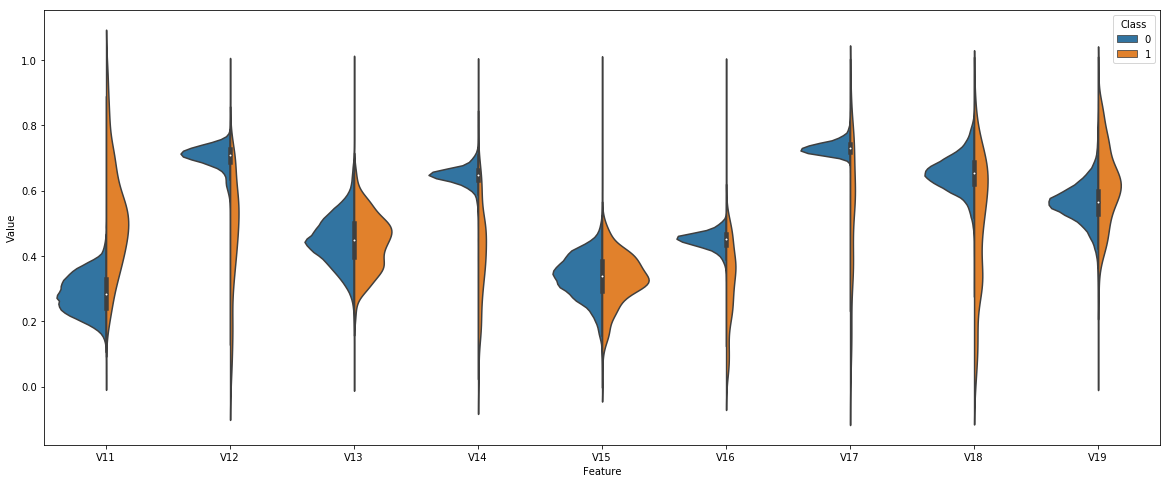

In [113]:
plt.figure(figsize=(20,8))
sns.violinplot(x="Feature",y="Value",hue="Class",data=sub_df22, split=True)

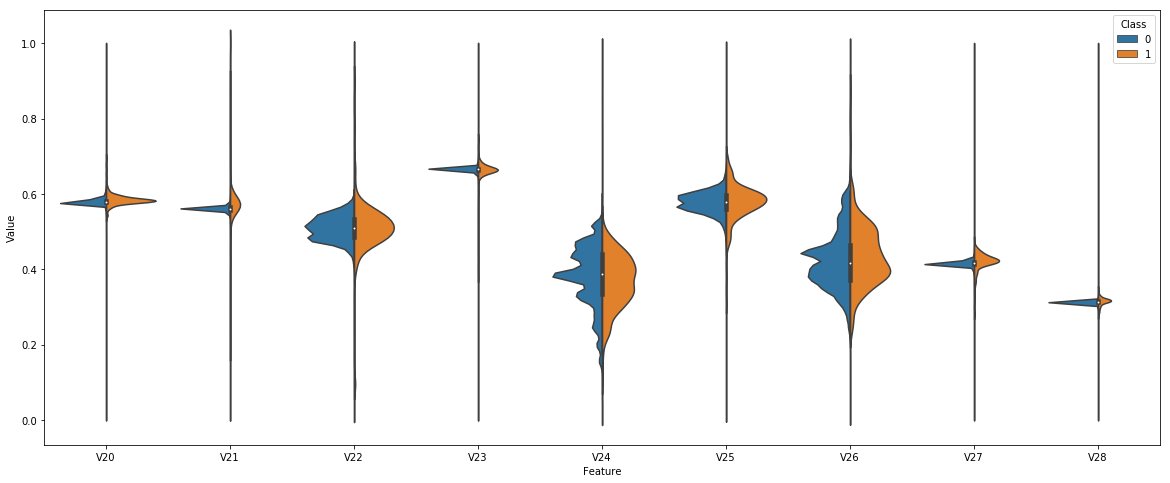

In [114]:
plt.figure(figsize=(20,8))
sns.violinplot(x="Feature",y="Value",hue="Class",data=sub_df33, split=True)
# Most of the features have difference between frauds and non-frauds
# But eg: V20 and 22 are very symmetric

In [115]:
# Drop all of the features that have very similar distributions between the two types of transactions.
df_features=df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','Time','Class'],axis=1)
# Normalize Amount
df_features["Amount"]=(df_features["Amount"]-df_features["Amount"].mean())/df_features["Amount"].std()
# Create train and test datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_features,y,test_size=0.3)

In [116]:
# Linear classifier in tensorflow
nV01 = tf.feature_column.numeric_column('V1')
nV02 = tf.feature_column.numeric_column('V2')
nV03 = tf.feature_column.numeric_column('V3')
nV04 = tf.feature_column.numeric_column('V4')
nV05 = tf.feature_column.numeric_column('V5')
nV06 = tf.feature_column.numeric_column('V6')
nV07 = tf.feature_column.numeric_column('V7')
nV09 = tf.feature_column.numeric_column('V9')
nV10 = tf.feature_column.numeric_column('V10')
nV11 = tf.feature_column.numeric_column('V11')
nV12 = tf.feature_column.numeric_column('V12')
nV14 = tf.feature_column.numeric_column('V14')
nV16 = tf.feature_column.numeric_column('V16')
nV17 = tf.feature_column.numeric_column('V17')
nV18 = tf.feature_column.numeric_column('V18')
nV19 = tf.feature_column.numeric_column('V19')
nV21 = tf.feature_column.numeric_column('V21')
nV22 = tf.feature_column.numeric_column('V22')
nV30 = tf.feature_column.numeric_column('Amount')

features=[nV01,nV02,nV03,nV04,nV05,nV06,nV07,nV09,nV10,nV11,nV12,nV14,nV16,nV17,nV18,nV19,nV21,nV30]

In [120]:
# Classification
# Tensorflow: Linear Classifier
input_func=tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=100,num_epochs=1000,shuffle=True) 
model=tf.estimator.LinearClassifier(feature_columns=features,n_classes=2)
model.train(input_fn=input_func,steps=1000)

result1=model.evaluate(tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10, num_epochs=1, shuffle=False))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpt72td7gq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6648b60e10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpt72td7gq/model.ckpt.
INFO:tensorflow:loss = 69.3147, step = 1
INFO:tensorflo

In [119]:
# Result of linear classification
print(result1)

{'accuracy': 0.99923253, 'accuracy_baseline': 0.99822438, 'auc': 0.97413462, 'auc_precision_recall': 0.75343776, 'average_loss': 0.013387345, 'label/mean': 0.0017756466, 'loss': 0.13386942, 'prediction/mean': 0.01170523, 'global_step': 1000}


In [121]:
# Test Linear classification
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10, num_epochs=1, shuffle=False)
results2=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-02-09-20:54:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpt72td7gq/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-02-09-20:54:42
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.999204, accuracy_baseline = 0.998385, auc = 0.970886, auc_precision_recall = 0.742394, average_loss = 0.0130009, global_step = 1000, label/mean = 0.00161511, loss = 0.129999, prediction/mean = 0.0115776


In [122]:
print(results2)

{'accuracy': 0.99920416, 'accuracy_baseline': 0.99838489, 'auc': 0.97088617, 'auc_precision_recall': 0.74239415, 'average_loss': 0.013000945, 'label/mean': 0.0016151118, 'loss': 0.1299988, 'prediction/mean': 0.011577642, 'global_step': 1000}


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpt72td7gq/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


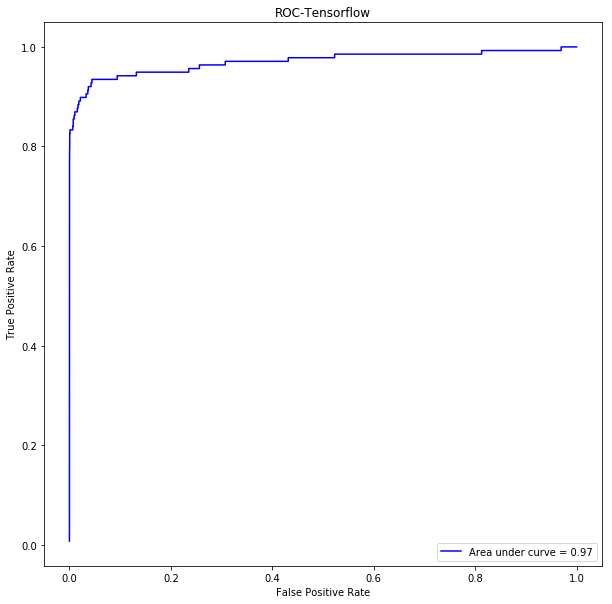

In [123]:
# Prediction:
from sklearn import metrics
pred_input_func= tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)
predictions = model.predict(pred_input_func)

y_pred=[d['logits'] for d in predictions]
fpr,tpr,thresholds=metrics.roc_curve(y_test, y_pred)
roc_auc=metrics.auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.title('ROC-Tensorflow')
plt.plot(fpr, tpr,'b', label='Area under curve = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# AUC=0.97 good to use the model

In [48]:
# Neural network: use all the attributes
x_neural=df.drop(['Class'],axis=1)
x_scaled_neural=(x_neural-x_neural.min())/(x_neural.max()-x_neural.min())
y_neural=df.Class
from sklearn.model_selection import train_test_split
x_train_neural,x_test_neural,y_train_neural,y_test_neural=train_test_split(x_scaled_neural,y_neural,test_size=0.3)

In [31]:
# Feed data into the network
def to_one_hot(c, depth):
    i=np.identity(depth)
    return i[c,:]

def train_batch(batch_size):
    for j in range(int(len(x_train_neural)/batch_size)):
        start=batch_size*j
        end=start+batch_size
        
        train_x_batch=x_train_neural[start:end]
        train_y_batch=y_train_neural[start:end]
        
        train_y_batch=np.apply_along_axis(lambda x:to_one_hot(x,depth=2),0,train_y_batch)
        
        yield train_x_batch, train_y_batch
        
def get_test_data():
    return x_test_neural, np.apply_along_axis(lambda x: to_one_hot(x, depth=2), 0, y_test_neural)

Epoch 1 loss: 71.2877158715
Epoch 2 loss: 11.4215643652
Epoch 3 loss: 7.24802451964


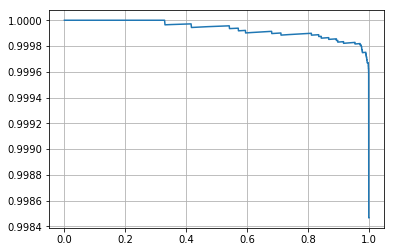

0.999933485828


In [41]:
import tensorflow as tf
from sklearn.metrics import average_precision_score, precision_recall_curve

X= tf.placeholder(tf.float32, [None, 30]) # inputs
Y= tf.placeholder(tf.float32, [None, 2]) # targets

def forward_propogation(X): # model
    num_neural= 10
    weights={"lvl_1": tf.Variable(tf.random_normal([30,num_neural])), 
               "output": tf.Variable(tf.random_normal([num_neural,2]))}
    
    biases={"lvl_1": tf.Variable(tf.random_normal([num_neural])), 
            "output": tf.Variable(tf.random_normal([2]))}
    
    h1=tf.add(tf.matmul(X, weights["lvl_1"]), biases["lvl_1"])
    h1=tf.nn.relu(h1)
    
    h2=tf.add(tf.matmul(h1, weights["output"]), biases["output"])
    output=tf.nn.relu(h2)
    
    return output

# Minimize loss
logits=forward_propogation(X)
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits))
optimizer=tf.train.AdamOptimizer(0.01).minimize(loss) 

# Confusion matrix accuracy
correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) 

# Precision-recall curve
decision_variable = tf.nn.softmax(logits) 

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    
    # train phase
    batch_size = 128
    n_epochs = 3
    for epoch in range(n_epochs):
        epoch_loss = 0
        batch_generator = train_batch(batch_size)
        for batch in batch_generator:
            batch_x, batch_t = batch 
            _, curr_loss = sess.run([optimizer, loss], feed_dict={Y: batch_t, X: batch_x})
            epoch_loss += curr_loss
            
        print("Epoch " + str(epoch+1) + " loss: " + str(epoch_loss))
        
    # test phase
    test_x, test_t = get_test_data()
    test_y = sess.run(decision_variable, feed_dict={X: test_x})
    
    auprc = average_precision_score(test_t[:,0], test_y[:,0])
    precision, recall, _ = precision_recall_curve(test_t[:,0], test_y[:,0])

    # plot pr curve
    plt.plot(recall, precision)
    plt.grid()
    plt.show()
    
    # print average precision
    print(auprc)
